# pandas and scikit-learn simple tutorial

## Kaggle Titanic 생존자 예측하기

https://www.kaggle.com/c/titanic/overview

## Data 가져오기

In [1]:
import pandas as pd

In [2]:
!ls *.zip

kaggle_titanic.zip


In [3]:
#!unzip ./kaggle_titanic.zip

In [4]:
!ls kaggle_titanic

gender_submission.csv test.csv
my_submission.csv     train.csv


In [5]:
train_df = pd.read_csv('kaggle_titanic/train.csv')

In [6]:
test_df = pd.read_csv('kaggle_titanic/test.csv')

## data 들여다 보기 

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

## 컬럼 확인

In [11]:
list(train_df.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [12]:
list(test_df.columns.values)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## DataFrame.info()
- 데이터의 크기
- 메모리 사용량
- count
- null check

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## describe

In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 분석 요약
- Age는 332
- Fare는 417

### null 값 확인하기
```
DataFrame.isnulll()
Series.isnull()
```

In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train_df['Age'].isnull().sum()

177

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### null data 채우기
- 분석을 위해서는 해당값들을 추정해서 채우거나
- 혹은 컬럼을 drop

## Data Visualization

- https://matplotlib.org/
- https://seaborn.pydata.org/

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 별도의 창이 아니라 노트북에 그래프가 표시되도록 함
%matplotlib inline 

# 캔바스 공간 크기 지정
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Visualization Helper Functions

correlation map을 그리기 위한 함수입니다. 다른 노트북에서 필요한 경우 아래 코드를 복사해서 사용하면 됩니다. (굳이 내용을 이해하지 않아도 됩니다.)

In [20]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

### Correlation Map 살펴보기

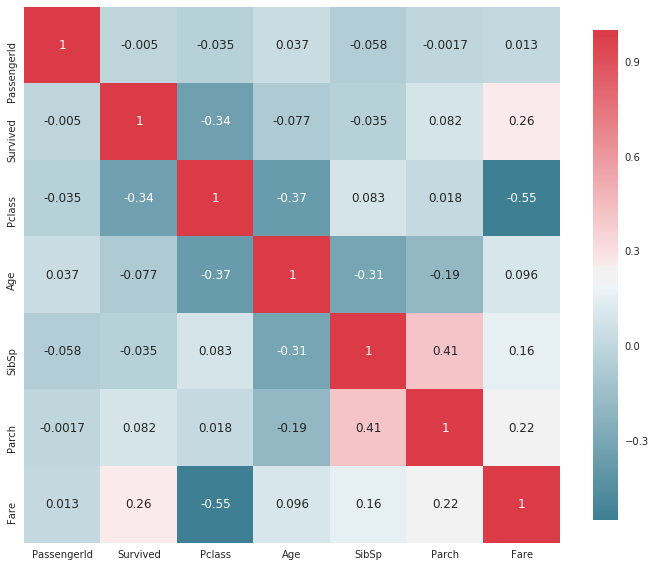

In [21]:
plot_correlation_map(train_df)

## 테이블 형태로 보기 

In [22]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## 상관관계에 없는 항목들 
- Sex
- Cabin
- Embarked


## 정렬하기

    DataFrame.sort_values(컬럼이름의리스트, ascending=False/True)

In [23]:
train_corr = train_df.corr()

In [24]:
train_corr[['Survived']]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


In [25]:
train_corr[['Survived']].sort_values(['Survived'], ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


## 절대값 정렬


In [26]:
train_corr[['Survived']].apply(abs).sort_values('Survived', ascending=False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Pclass, Fare, Parch, Age, SibSp 순으로 높은 상관관계를 보이는 것을 확인

### correlation을 통해 확인한 문제점

- null값에 대한 처리가 아직 안함
- 숫자가 아닌 값들(카테고리 데이터)이 빠져 있음

## Data Pre-Processing

1. null 값 제거
2. 카테고리 값을 숫자로 변환 

### full data 만들기

    pd.concat([df1, df2, ...], axis=축방향)
    new_df = df.append(df2)   

### row 삭제 

    df.drop(삭제하고자하는컬럼이름, axis=축방향)

In [28]:
full_df = train_df.append(test_df)

In [29]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


shape으로 전체 행수를 확인해 봅시다.

In [30]:
full_df.shape

(1309, 12)

### 숫자 데이터들의 null 값 처리하기

#### Pclass

In [31]:
full_df['Pclass'].isnull().sum()

0

#### Fare

In [32]:
full_df['Fare'].isnull().sum()

1

### Fill Fare

In [33]:
full_df[full_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


요금과 관련될 것 같은 해당 승객의 데이터를 살펴 보면 Cabin값이 null, Embarked가 S, Pclass는 3이라는 것을 알 수 있다.

전체 승객 데이터의 Embarked, Fare, Pclass 간의 관계를 확인해 보자. 
    


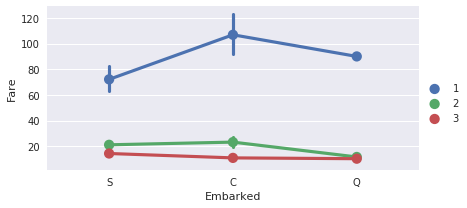

In [34]:
grid = sns.FacetGrid(full_df, size=3, aspect=2)
grid.map(sns.pointplot, 'Embarked', 'Fare', 'Pclass', palette='deep', order=None, hue_order=None)
grid.add_legend()

- Pclass와 Embarked 값에 따라서 Fare가 큰 폭으로 변하는 것을 확인할 수 있다.
- Pclass=3이면서 Embarked = S인 사람의 평균값을 사용하자.

In [35]:
full_df[(full_df['Embarked']== 'S') & (full_df['Pclass'] == 3)]['Fare'].shape

(495,)

In [36]:
fare = full_df[(full_df['Embarked']== 'S') & (full_df['Pclass'] == 3)]['Fare'].mean()
print(fare)

14.435422064777338


## na 채우기 
    Series.fillna(채우고자하는값, inplace=True)

In [37]:
full_df[full_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [38]:
full_df['Fare'].fillna(fare, inplace=True)

In [39]:
full_df[full_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [40]:
full_df[full_df['PassengerId'] ==1044]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,14.435422,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


#### Parch

In [41]:
full_df['Parch'].isnull().sum()

0

#### Age

In [42]:
full_df['Age'].isnull().sum()

263

총 263명의 승객에 대한 Age 데이터가 없습니다.

### 비율 구하기 


In [43]:
full_df.shape

(1309, 12)

In [44]:
full_df['Age'].isnull().mean()

0.20091673032849502

In [45]:
full_df['Age'].isnull().sum() / full_df.shape[0]

0.20091673032849502

약 20%의 승객이 나이에 대한 데이터가 없다는 것을 알 수 있습니다. 왜 이 데이터가 없을까요?

이 의문을 해결하기 위해 해당 승객들의 생존율을 전체 승객들의 생존율과 비교해 봅시다. 

**주의: 생존여부는 train_df에만 있기 때문에 train_df를 이용해서 구해야 합니다.**

먼저 train_df에 속한 승객들 전체의 생존율을 구해 봅시다.

In [46]:
train_df['Survived'].mean()

0.3838383838383838

약 0.383 정도입니다.

Age 값이 null인 승객들의 생존율의 평균을 구해 봅시다.

In [47]:
train_df[train_df['Age'].notnull()]['Survived'].mean()

0.4061624649859944

In [48]:
train_df[train_df['Age'].isnull()]['Survived'].mean()

0.2937853107344633

약 0.293 정도라는 것을 확인할 수 있습니다.

상대적으로 나이 정보가 없는 사람들의 생존율이 10% 정도 떨어진다는 것을 확인할 수 있습니다. 이는 아마도 생존하지 못했기 때문에 나이 정보가 없는 것이 아닐까 하고 추측해 볼 수 있습니다.

이 가설을 바탕으로 Age를 직접 사용하지 않고 **나이 정보가 없다는 여부**를 feature로 사용합시다.

### AgeNull 컬럼 만들기 

'나이가 비어 있는지 여부'를 나타내는 Series를 만들어서 full_df에 **'AgeNull'**이라는 새로운 컬럼으로 저장합시다. 어떻게 할 수 있을까요?

** 주의: True/False가 아닌 숫자가 저장되어야 합니다. 왜일까요? **

힌트: True/False는 아래 명령으로 숫자로 만들 수 있습니다.
    
    int(값)

head 메소드로 확인합시다.

In [49]:
full_df['AgeNotNull'] = full_df['Age'].notnull().apply(int)

In [50]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


In [51]:
full_df['AgeNotNull'].mean()

0.799083269671505

#### SibSp

SibSp 데이터에 null 값이 있는지 확인해 봅시다.

In [52]:
full_df['SibSp'].isnull().sum()

0

### 카테고리 데이터를 숫자값으로 변환하기

#### Sex 숫자값으로 변환하기

먼저 null 값이 있는지 확인합시다.

In [53]:
full_df['Sex'].isnull().sum()

0

##### 문자값을 숫자값으로 변환하기
female 또는 male 값을 숫자로 변환합시다.

- female: 0
- male: 1

### 함수 만들기 

**convert_sex_string_to_numeric**라는 함수를 만드세요. 하나의 argument를 받아서 해당 값이 female이면 0을, male이면 1을 반환해야 합니다.

In [54]:
def convert_sex_string_to_numeric(sex):
    return int(sex == 'male')

In [55]:
print(convert_sex_string_to_numeric('female'))
print(convert_sex_string_to_numeric('male'))

0
1


해당 함수를 Sex 데이터에 적용한 다음, full_df에 'Sex_code'라는 새로운 컬럼을 만들어 저장합시다.

In [56]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


In [56]:
full_df['SexCode'] = full_df['Sex'].apply(convert_sex_string_to_numeric)

잘 저장되었는지 head 메소드로 확인합시다.

In [57]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull,SexCode
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1


#### Embarked  숫자값으로 변환하기

먼저 null 값이 있는지 확인합시다.

In [58]:
full_df['Embarked'].isnull().sum()

2

2명에게 null 값이 존재합니다.

어떤 승객들인지 확인해 봅시다.

In [59]:
full_df[full_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull,SexCode
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,1,0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,1,0


여기서 2명 모두 Pclass가 1이라는 것에 주목합시다. (Cabin과 Fare는 너무 구체적인 - 변동성이 큰 - 정보이기 때문에 Embarked를 구하는데 도움이 되지 않다고 가정합니다.)

아래 코드를 이용해서 전체 데이터 중에서 **Pclass가 1인 승객들**의 Embarked 데이터의 분포를 확인해 봅시다.

    grid.map(그래프종류, x=x축데이터로사용할컬럼이름, y=y축데이터로사용할컬럼이름, hue=hue로사용할컬럼이름)
    
여기서는 matplotli의 histogram 그래프를, x축에는 Embarked를, y축은 미지정(데이터 개수를 세게 됨) 등을 사용하고자 합니다.

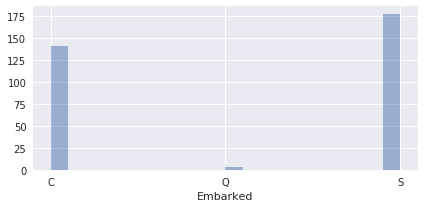

In [60]:
grid = sns.FacetGrid(full_df[full_df['Pclass'] == 1], size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

## embarked

In [61]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2명 모두 train_df에 속해 있고 생존했다는 것을 확인할 수 있습니다. 이를 근거로 **Pclass == 1이고 생존한 사람들의 Embarked를 파악해서 null 값을 채우고자 합니다.**

아래 코드를 이용하면 Pclass가 1이고 생존한 승객들의 Embarked 분포를 파악할 수 있습니다.

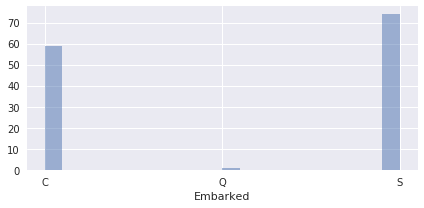

In [62]:
grid = sns.FacetGrid(train_df[(train_df['Pclass'] == 1) & (train_df['Survived'] == 1)], size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

또 다른 방법은 아래처럼 여러개의 그래프를 동시에 그려서 파악하는 방법입니다. grid에 row와 col을 지정해서 해당값에 따라 여러개의 그래프가 그려지도록 합니다. 

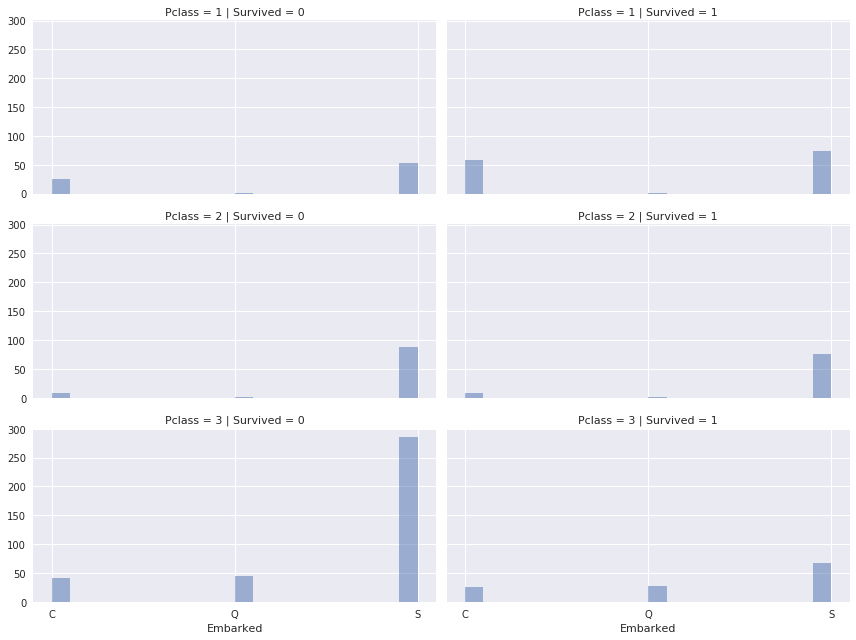

In [63]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=3, aspect=2)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)

카테고리 값이기 때문에 가장 많은 데이터 (S)를 이용하기로 합니다.

해당값으로 full_df의 Embarked의 null 값을 채워 봅시다.

In [64]:
full_df['Embarked'].fillna('S', inplace=True)

반드시 제대로 채워졌는지 확인합시다.

In [65]:
full_df['Embarked'].isnull().sum()

0

#### 문자값을 숫자값으로 변환하기
이제 문자값으로 된 카테고리를 숫자로 변환합시다. 많은 순서대로 0부터 지정합시다.

- S: 0
- C: 1
- Q: 2

**convert_embarked_string_to_numeric**라는 함수를 만드세요. 하나의 argument를 받아서 해당 값이 S이면 0을, C이면 1을, Q이면 2를 반환해야 합니다.

In [66]:
def convert_embarked_string_to_numeric(embarked):
    if embarked == 'S':
        return 0
    elif embarked == 'C':
        return 1
    else:
        return 2

해당 함수를 Embarked 데이터에 적용한 다음, full_df에 'Embarked_cde'라는 새로운 컬럼을 만들어 저장합시다.

In [67]:
full_df['EmbarkedCode'] = full_df['Embarked'].apply(convert_embarked_string_to_numeric)

head 메소드를 이용해서 확인합시다.

In [68]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull,SexCode,EmbarkedCode
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1,0


### 문자값들 확인하기

Cabin, Ticket, Name 등은 문자열의 데이터입니다.

#### Cabin 살펴보기

Cabin 데이터에 null 값이 있는지 확인해 봅시다.

In [69]:
full_df['Cabin'].isnull().sum()

1014

총 1014명의 승객에 대한 Cabin 데이터가 없습니다. 전체 승객 수에서 차지하는 비율을 구해 봅시다.

In [70]:
full_df['Cabin'].isnull().mean()

0.774637127578304

약 77% 승객이 Cabin 데이터가 없다는 것을 확인할 수 있습니다. 왜 이 데이터가 없을까요?

이 의문을 해결하기 위해 해당 승객들의 생존율을 전체 승객들의 생존율과 비교해 봅시다. 

**주의: 생존여부는 train_df에만 있기 때문에 train_df를 이용해서 구해야 합니다.**

먼저 train_df에 속한 승객들 전체의 생존율을 구해 봅시다.

In [71]:
train_df['Survived'].mean()

0.3838383838383838

약 0.383 정도입니다.

Cabin 값이 null인 승객들의 생존율의 평균을 구해 봅시다.

In [72]:
train_df[train_df['Cabin'].isnull()]['Survived'].mean()

0.29985443959243085

약 0.299 정도라는 것을 확인할 수 있습니다.

상대적으로 Cabin 정보가 없는 사람들의 생존율이 9% 정도 떨어진다는 것을 확인할 수 있습니다. 이는 아마도 생존하지 못했기 때문에 Cabin 정보가 없는 것이 아닐까 하고 추측해 볼 수 있습니다.

이 가설을 바탕으로 Cabin을 직접 사용하지 않고 **Cabin 정보가 없다는 여부**를 feature로 사용합시다.

상대적으로 Cabin 정보가 없는 사람들이 훨씬 많이 죽었다는 것을 알 수 있다. 아마도 죽었기 때문에 Cabin 정보가 없기 때문이 아닐까 하고 추측해 볼 수 있습니다. 

**그래서 이 값을 feature로 사용하고자 합니다.**

### CabinNull

'Cabin값이 비어 있는지 여부'를 나타내는 Series를 만들어서 full_df에 **'CabinNull'**이라는 새로운 컬럼으로 저장합시다. 어떻게 할 수 있을까요?

** 주의: True/False가 아닌 숫자가 저장되어야 합니다. 왜일까요? **

힌트: True/False는 아래 명령으로 숫자로 만들 수 있습니다.
    
    int(값)

In [73]:
full_df['CabinNull'] = full_df['Cabin'].isnull().apply(int)

head 메소드로 확인합시다.

In [74]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull,SexCode,EmbarkedCode,CabinNull
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1,0,1


### Correlation Map 다시 확인하기

correlation map은 Survived 값이 필요하기 때문에 full_df가 아닌 train_df에 있는 승객들만의 데이터로 그려야 합니다. 그래서 full_df를 이용해서 새로운 df를 만들어야 합니다. **train_process_df**라는 df를 만듭니다.

In [75]:
train_df.shape[0]

891

In [76]:
len(train_df)

891

In [78]:
train_processed_df = full_df[:len(train_df)]

head 메소드로 확인합시다.

In [79]:
train_processed_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeNotNull,SexCode,EmbarkedCode,CabinNull
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,1,0,1


위에서 만든 train_processed_df을 넣어서 correlation map을 그려 봅시다.

    plot_correlation_map(df)

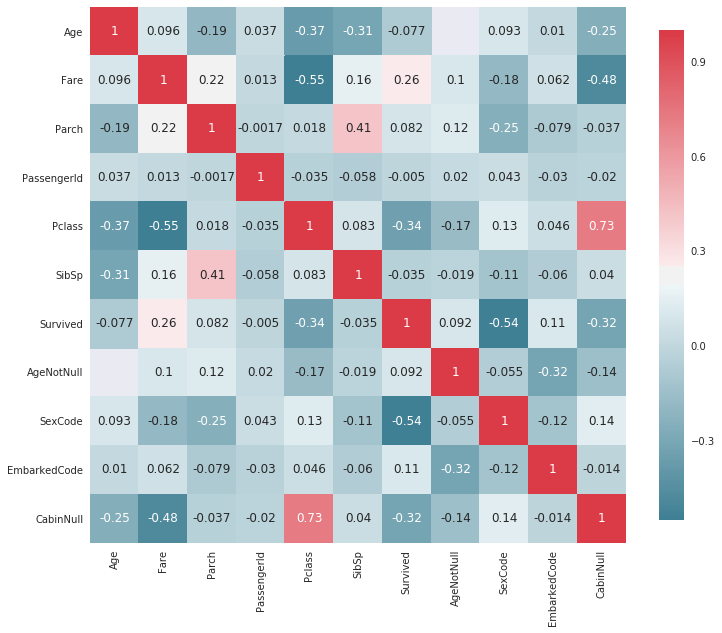

In [80]:
plot_correlation_map(train_processed_df)

corr() 메소드로 표를 그려 봅시다.

In [81]:
abs(train_processed_df.corr()[['Survived']]).sort_values('Survived', ascending=False)

,Survived
Survived,1.000000
SexCode,0.543351
Pclass,0.338481
CabinNull,0.316912
Fare,0.257307
EmbarkedCode,0.106811
AgeNotNull,0.092197
Parch,0.081629
Age,0.077221
SibSp,0.035322


새로이 추가한 데이터들이 생존율과 상당히 높은 상관 관계를 가지는 것을 확인할 수 있습니다.

- 카테고리 데이터를 숫자로 변환한 데이터: Sex_code, Embarked_code
- 우리가 새로이 추가한 카테고리 데이터: CabinNull, AgeNull, Cabin_mapped

## Feature data 만들기

이제 모델을 학습하기 위해서 필요한 데이터들로만 이루어진 df를 만들고자 합니다.

제거하고자 하는 데이터 컬럼의 이름 리스트를 만들고 전체 데이터의 컬럼 이름 리스트에서 뺍니다. (리스트 간의 연산이 바로 이루어지지 않아서 set 명령을 이용해서 집합연산을 하고 다시 리스트로 변환합니다.)

In [82]:
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Age', 'Survived']

In [83]:
full_df.columns.values.tolist()

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'AgeNotNull',
 'SexCode',
 'EmbarkedCode',
 'CabinNull']

In [84]:
features = list(set(full_df.columns.values) - set(drop_features))
features

['EmbarkedCode',
 'Pclass',
 'CabinNull',
 'Fare',
 'SibSp',
 'AgeNotNull',
 'SexCode',
 'Parch']

features를 출력해서 우리가 features로 사용하고자 하는 컬럼 이름들로만 구성되어 있는지 확인합시다.

### 컬럼 필터링 

해당 컬럼들의 데이터로만 이루어진 df를 출력해 봅시다.

In [85]:
full_df[features].head()

,EmbarkedCode,Pclass,CabinNull,Fare,SibSp,AgeNotNull,SexCode,Parch
0,0,3,1,7.2500,1,1,1,0
1,1,1,0,71.2833,1,1,0,0
2,0,3,1,7.9250,0,1,0,0
3,0,1,0,53.1000,1,1,0,0
4,0,3,1,8.0500,0,1,1,0


### 머신 러닝 

생존자 데이터의 레이블을 Y_data에 저장해 봅시다.

In [86]:
X_train = train_processed_df[features]
X_train.head()

,EmbarkedCode,Pclass,CabinNull,Fare,SibSp,AgeNotNull,SexCode,Parch
0,0,3,1,7.2500,1,1,1,0
1,1,1,0,71.2833,1,1,0,0
2,0,3,1,7.9250,0,1,0,0
3,0,1,0,53.1000,1,1,0,0
4,0,3,1,8.0500,0,1,1,0


In [87]:
X_train.shape

(891, 8)

In [88]:
Y_train = train_df.Survived
len(Y_train)

891

In [89]:
len(test_df)

418

## test data

In [90]:
test_processed_df = full_df[len(train_df):]
test_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
Age             332 non-null float64
Cabin           91 non-null object
Embarked        418 non-null object
Fare            418 non-null float64
Name            418 non-null object
Parch           418 non-null int64
PassengerId     418 non-null int64
Pclass          418 non-null int64
Sex             418 non-null object
SibSp           418 non-null int64
Survived        0 non-null float64
Ticket          418 non-null object
AgeNotNull      418 non-null int64
SexCode         418 non-null int64
EmbarkedCode    418 non-null int64
CabinNull       418 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 55.5+ KB


In [91]:
X_test = test_processed_df[features]
X_test.head()

,EmbarkedCode,Pclass,CabinNull,Fare,SibSp,AgeNotNull,SexCode,Parch
0,2,3,1,7.8292,0,1,1,0
1,0,3,1,7.0000,1,1,0,0
2,2,2,1,9.6875,0,1,1,0
3,0,3,1,8.6625,0,1,1,0
4,0,3,1,12.2875,1,1,0,1


In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.46

In [94]:
len(Y_pred)

418

In [95]:
import numpy as np

In [96]:
np.mean(Y_pred)

0.3923444976076555

submission의 shape을 출력하고 head 메소드로 데이터를 살펴 봅시다.

In [97]:
Y_pred[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [124]:
!ls kaggle_titanic

gender_submission.csv  test.csv  train.csv


In [98]:
submission = pd.read_csv('./kaggle_titanic/gender_submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [99]:
submission = submission.drop('Survived', axis = 1)

In [100]:
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [101]:
submission['Survived'] = Y_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [102]:
submission.to_csv('kaggle_titanic/my_submission.csv', index=False)

submission 화일이 성공적으로 만들어졌습니다.